<h1 ><center><b>Exploratory Data Analysis on Global Terrorism</b></center></h1>

<h3><center><i>Finding hot zones of terrorism using EDA</i></center></h3> 

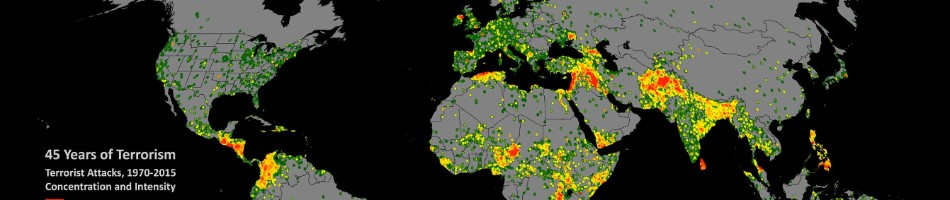

## Importing libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import calendar

# More Data Preprocessing & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for displaying all the columns
pd.set_option('display.max_columns',None)

## Loading the data

In [2]:
df = pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1')

In [3]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


## Shape of the dataset

In [4]:
shape = df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the dataset')

There are 181691 rows and 135 columns in the dataset


## Columns of the dataset

In [5]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

## Statistical Summary

In [6]:
# Of numeric columns
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

In [7]:
# of object columns
df.describe(include="object")

approxdate resolution country_txt  \
count                    9239       2220      181691   
unique                   2244       1859         205   
top     September 18-24, 2016   8/4/1998        Iraq   
freq                      101         18       24636   

                        region_txt provstate     city  \
count                       181691    181270   181257   
unique                          12      2855    36674   
top     Middle East & North Africa   Baghdad  Unknown   
freq                         50474      7645     9775   

                                                location  \
count                                              55495   
unique                                             44109   
top     The attack took place in Baghdad, Baghdad, Iraq.   
freq                                                 142   

                                                  summary  \
count                                              115562   
unique                                             112492   
top     09/00/2016: Sometime between September 18, 201...   
freq                                                  100   

                   alternative_txt    attacktype1_txt attacktype2_txt  \
count                        29011             181691            6314   
unique                           5                  9               9   
top     Insurgency/Guerilla Action  Bombing/Explosion   Armed Assault   
freq                         23410              88255            3434   

                       attacktype3_txt                targtype1_txt  \
count                              428                       181691   
unique                               8                           22   
top     Facility/Infrastructure Attack  Private Citizens & Property   
freq                               229                        43511   

                    targsubtype1_txt    corp1    target1 natlty1_txt  \
count                         171318   139141     181055      180132   
unique                           112    33238      86006         215   
top     Unnamed Civilian/Unspecified  Unknown  Civilians        Iraq   
freq                           11596    16356       6461       24113   

                      targtype2_txt              targsubtype2_txt  \
count                         11144                         10685   
unique                           22                           107   
top     Private Citizens & Property  Unnamed Civilian/Unspecified   
freq                           5585                          3482   

                 corp2    target2 natlty2_txt                targtype3_txt  \
count            10117      11020       10828                         1176   
unique            2691       5043         158                           20   
top     Not Applicable  Civilians        Iraq  Private Citizens & Property   
freq              3309       2376        1786                          554   

                    targsubtype3_txt           corp3    target3 natlty3_txt  \
count                           1097            1026       1175        1147   
unique                            92             422        720         110   
top     Unnamed Civilian/Unspecified  Not Applicable  Civilians        Iraq   
freq                             325             312        200         139   

          gname   gsubname           gname2   gsubname2            gname3  \
count    181691       5890             2013         160               324   
unique     3537       1183              433          60               116   
top     Unknown  Militants  Al-Nusrah Front  The Family  Free Syrian Army   
freq      82782        480               56          20                19   

                        gsubname3   motive   claimmode_txt claimmode2_txt  \
count                          20    50561           19083            616   
unique                         14    14490              10              9   
top     Jays

## Detecting Missing values

In [8]:
# count of missing values

for i in df.columns:
    print(f"{i}: {df[i].isna().sum()}")

eventid: 0
iyear: 0
imonth: 0
iday: 0
approxdate: 172452
extended: 0
resolution: 179471
country: 0
country_txt: 0
region: 0
region_txt: 0
provstate: 421
city: 434
latitude: 4556
longitude: 4557
specificity: 6
vicinity: 0
location: 126196
summary: 66129
crit1: 0
crit2: 0
crit3: 0
doubtterr: 1
alternative: 152680
alternative_txt: 152680
multiple: 1
success: 0
suicide: 0
attacktype1: 0
attacktype1_txt: 0
attacktype2: 175377
attacktype2_txt: 175377
attacktype3: 181263
attacktype3_txt: 181263
targtype1: 0
targtype1_txt: 0
targsubtype1: 10373
targsubtype1_txt: 10373
corp1: 42550
target1: 636
natlty1: 1559
natlty1_txt: 1559
targtype2: 170547
targtype2_txt: 170547
targsubtype2: 171006
targsubtype2_txt: 171006
corp2: 171574
target2: 170671
natlty2: 170863
natlty2_txt: 170863
targtype3: 180515
targtype3_txt: 180515
targsubtype3: 180594
targsubtype3_txt: 180594
corp3: 180665
target3: 180516
natlty3: 180544
natlty3_txt: 180544
gname: 0
gsubname: 175801
gname2: 179678
gsubname2: 181531
gname3: 1813

In [9]:
# percentage of missing values

for i in df.columns:
    print(f"{i}: {round((df[i].isna().sum()/len(df)*100),2)}%")

eventid: 0.0%
iyear: 0.0%
imonth: 0.0%
iday: 0.0%
approxdate: 94.91%
extended: 0.0%
resolution: 98.78%
country: 0.0%
country_txt: 0.0%
region: 0.0%
region_txt: 0.0%
provstate: 0.23%
city: 0.24%
latitude: 2.51%
longitude: 2.51%
specificity: 0.0%
vicinity: 0.0%
location: 69.46%
summary: 36.4%
crit1: 0.0%
crit2: 0.0%
crit3: 0.0%
doubtterr: 0.0%
alternative: 84.03%
alternative_txt: 84.03%
multiple: 0.0%
success: 0.0%
suicide: 0.0%
attacktype1: 0.0%
attacktype1_txt: 0.0%
attacktype2: 96.52%
attacktype2_txt: 96.52%
attacktype3: 99.76%
attacktype3_txt: 99.76%
targtype1: 0.0%
targtype1_txt: 0.0%
targsubtype1: 5.71%
targsubtype1_txt: 5.71%
corp1: 23.42%
target1: 0.35%
natlty1: 0.86%
natlty1_txt: 0.86%
targtype2: 93.87%
targtype2_txt: 93.87%
targsubtype2: 94.12%
targsubtype2_txt: 94.12%
corp2: 94.43%
target2: 93.93%
natlty2: 94.04%
natlty2_txt: 94.04%
targtype3: 99.35%
targtype3_txt: 99.35%
targsubtype3: 99.4%
targsubtype3_txt: 99.4%
corp3: 99.44%
target3: 99.35%
natlty3: 99.37%
natlty3_txt: 99.

## Initial Data Cleaning

### Selecting meaningful features for further analysis

##### Dropping features

In [10]:
## Dropping features with more than 40% missing values -----> won't contribute much to analysis

## features with more than 40% missing values
high_null_cols = []
for i in df.columns:
    perc_null = round((df[i].isna().sum()/len(df)*100),2)
    if perc_null > 40.0:
        high_null_cols.append(i)
print(high_null_cols)

['approxdate', 'resolution', 'location', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnot

In [11]:
## Dropping features with more than 40% missing values
for i in high_null_cols:
    df.drop(i, axis = 1, inplace= True)

In [12]:
## Dropping redundant columns 

df.drop(columns=["eventid", "region", "attacktype1", "targtype1", "targsubtype1", "natlty1", 
                 "weaptype1", "weapsubtype1", "specificity", "guncertain1", "dbsource", "country",
                "INT_ANY", "INT_LOG","INT_IDEO", "INT_MISC", "latitude", "longitude","targsubtype1_txt",
                "crit1", "crit2", "crit3", "doubtterr", "multiple", "nperps", "nperpcap","claimed",
                "weapsubtype1_txt", "weapdetail", "nkillus", "nkillter", "nwoundus", "nwoundus", "nwoundte",
                "ishostkid", "scite1"], axis=1, inplace=True)

##### Meaningful features

In [13]:
# remaining columns
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'vicinity', 'summary', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'corp1', 'target1', 'natlty1_txt',
       'gname', 'individual', 'weaptype1_txt', 'nkill', 'nwound', 'property'],
      dtype='object')

In [14]:
print(f"Total features after initial cleaning are: {(len(df.columns))}")

Total features after initial cleaning are: 23


In [15]:
# Out of 135, meaningful features are coming out to be 23 only. Let's analyze these columns.

### Renaming features

In [16]:
# Renaming features with appropriate names

df.rename(columns={"iyear":"year","imonth":"month","iday":"day","country_txt":"country",
                   "region_txt":"region","provstate":"province/state","attacktype1_txt":"attack_type",
                   "targtype1_txt":"target_type", "natlty1_txt":"nationality",
                   "gname":"group_name","weaptype1_txt":"weapon_type","individual":"is_individual",
                   "nkill":"killed","nwound":"wounded", "property":"is_property_damaged",
                  "corp1": "entity_targeted", "target1":"specific_target"},inplace=True)

## Cleaned Dataset for Analysis

In [17]:
df.head()

year  month  day  extended             country  \
0  1970      7    2         0  Dominican Republic   
1  1970      0    0         0              Mexico   
2  1970      1    0         0         Philippines   
3  1970      1    0         0              Greece   
4  1970      1    0         0               Japan   

                        region province/state           city  vicinity  \
0  Central America & Caribbean            NaN  Santo Domingo         0   
1                North America        Federal    Mexico city         0   
2               Southeast Asia         Tarlac        Unknown         0   
3               Western Europe         Attica         Athens         0   
4                    East Asia        Fukouka        Fukouka         0   

  summary  success  suicide                     attack_type  \
0     NaN        1        0                   Assassination   
1     NaN        1        0     Hostage Taking (Kidnapping)   
2     NaN        1        0                   Assassination   
3     NaN        1        0               Bombing/Explosion   
4     NaN        1        0  Facility/Infrastructure Attack   

                   target_type              entity_targeted  \
0  Private Citizens & Property                          NaN   
1      Government (Diplomatic)  Belgian Ambassador Daughter   
2          Journalists & Media             Voice of America   
3      Government (Diplomatic)                          NaN   
4      Government (Diplomatic)                          NaN   

           specific_target         nationality  \
0             Julio Guzman  Dominican Republic   
1  Nadine Chaval, daughter             Belgium   
2                 Employee       United States   
3             U.S. Embassy       United States   
4           U.S. Consulate       United States   

                           group_name  is_individual weapon_type  killed  \
0                              MANO-D              0     Unknown     1.0   
1  23rd of September Communist League              0     Unknown     0.0   
2                             Unknown              0     Unknown     1.0   
3                             Unknown              0  Explosives     NaN   
4                             Unknown              0  Incendiary     NaN   

   wounded  is_property_damaged  
0      0.0                    0  
1      0.0                    0  
2      0.0                    0  
3      NaN                    1  
4      NaN                    1

## Basic information about the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 181691 non-null  int64  
 1   month                181691 non-null  int64  
 2   day                  181691 non-null  int64  
 3   extended             181691 non-null  int64  
 4   country              181691 non-null  object 
 5   region               181691 non-null  object 
 6   province/state       181270 non-null  object 
 7   city                 181257 non-null  object 
 8   vicinity             181691 non-null  int64  
 9   summary              115562 non-null  object 
 10  success              181691 non-null  int64  
 11  suicide              181691 non-null  int64  
 12  attack_type          181691 non-null  object 
 13  target_type          181691 non-null  object 
 14  entity_targeted      139141 non-null  object 
 15  specific_target  

## Missing values

In [19]:
df.isna().sum()

year                       0
month                      0
day                        0
extended                   0
country                    0
region                     0
province/state           421
city                     434
vicinity                   0
summary                66129
success                    0
suicide                    0
attack_type                0
target_type                0
entity_targeted        42550
specific_target          636
nationality             1559
group_name                 0
is_individual              0
weapon_type                0
killed                 10313
wounded                16311
is_property_damaged        0
dtype: int64

In [20]:
## Missing values are present in:
# - Object columns: province/state, city, entity_targeted, specific target, nationality can be imputed using mode value.
# - Numeric columns: killed, wounded can imputed using mean(if outliers are not present) or median(if outliers are present).
# - Summary: Though an object column, still can't impute using mode as summary of each incident would be different.
#   Therefore, it's better to keep missing values as they are.

## Checking outliers

<AxesSubplot:xlabel='killed'>

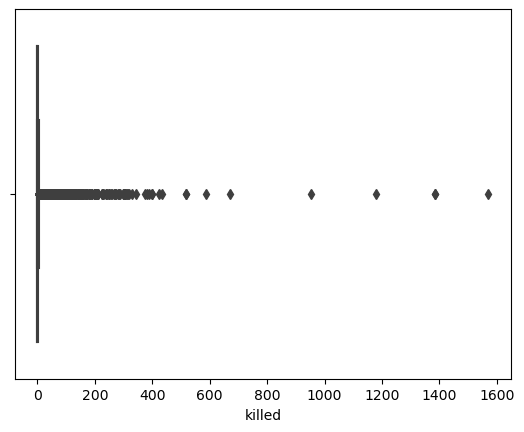

In [21]:
sns.boxplot(df["killed"])

<AxesSubplot:xlabel='wounded'>

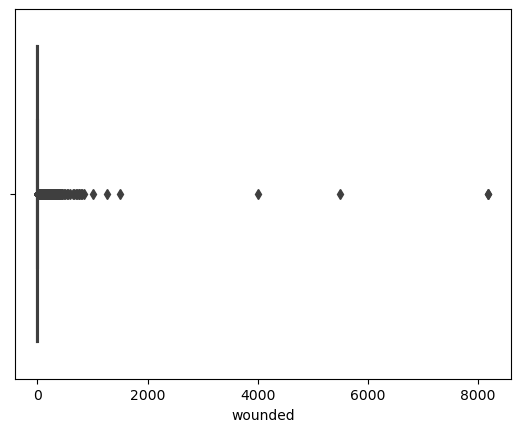

In [22]:
sns.boxplot(df["wounded"])

In [23]:
# Outliers are present in both the columns: killed and wounded. 
# But we can keep them as they are as removing them might remove important information from the datasest.

# Visualization 

### Success Rate of Terrorist attacks

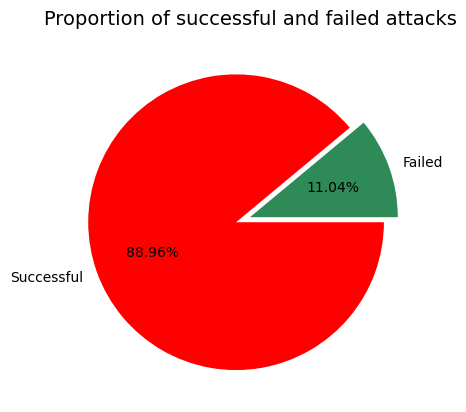

In [24]:
data = [df.success.value_counts()[0], df.success.value_counts()[1]]
keys = ["Failed", "Successful"]
explode = [0, 0.1]
palette_color = ["seagreen", "red"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of successful and failed attacks", size = 14)
plt.show()

In [25]:
# Approximately 89% of the attacks were successful and only 11% got failed.

### Yearly trend

In [26]:
yearly_attacks = df.groupby('year').size().reset_index(name='count')

In [27]:
yearly_attacks.T

0     1     2     3     4     5     6     7     8     9     10    11  \
year   1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981   
count   651   471   568   473   581   740   923  1319  1526  2662  2662  2586   

         12    13    14    15    16    17    18    19    20    21    22    23  \
year   1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1994   
count  2544  2870  3495  2915  2860  3183  3721  4324  3887  4683  5071  3456   

         24    25    26    27    28    29    30    31    32    33    34    35  \
year   1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006   
count  3081  3058  3197   934  1395  1814  1906  1333  1278  1166  2017  2758   

         36    37    38    39    40    41     42     43     44     45     46  
year   2007  2008  2009  2010  2011  2012   2013   2014   2015   2016   2017  
count  3242  4805  4721  4826  5076  8522  12036  16903  14965  13587  10900

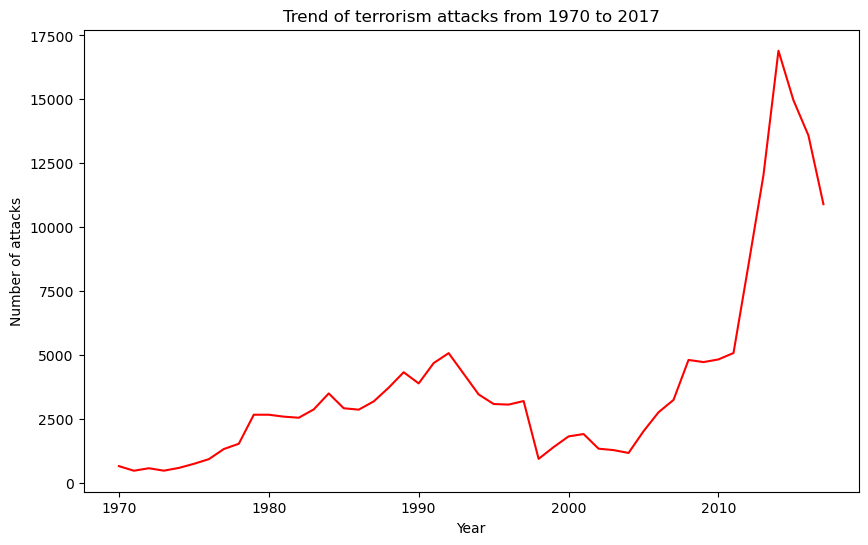

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='count', data = yearly_attacks, color='red')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Trend of terrorism attacks from 1970 to 2017')
plt.show()

In [29]:
# We can see the increasing trend of terrorist attacks since 1970. 
# Only around 1992-2004, we can see drop in the trend which again picked up the pace after 2005.
# Maximum attacks had taken place in the year 2014.

### Monthly trend

In [30]:

df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [31]:
monthly_attacks = df.groupby('month').size().reset_index(name='count')[1:]

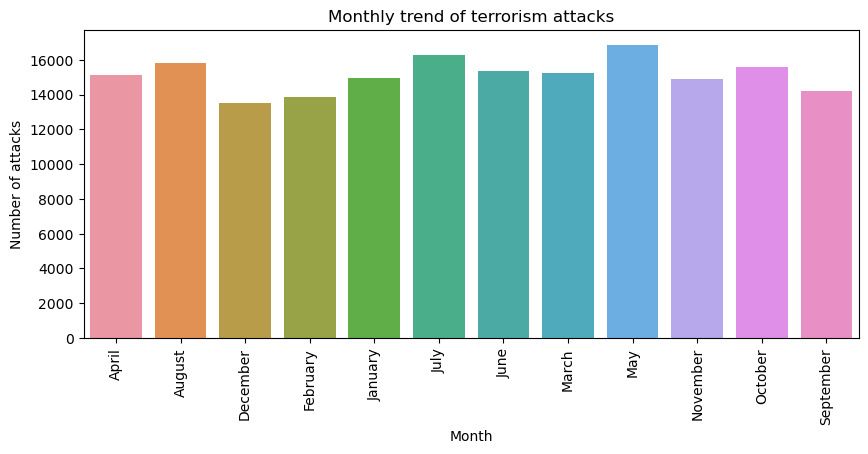

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x='month', y='count', data = monthly_attacks)
plt.xlabel('Month')
plt.ylabel('Number of attacks')
plt.title('Monthly trend of terrorism attacks')
plt.xticks(rotation=90)
plt.show()

In [33]:
# There is no significant impact of months on the analysis of terrorist attacks. 
# Nevertheless, maximum attacks were carried out in the months of May, July and August.

### Daily analysis

In [34]:
day_attacks = df.groupby('day').size().reset_index(name='count')

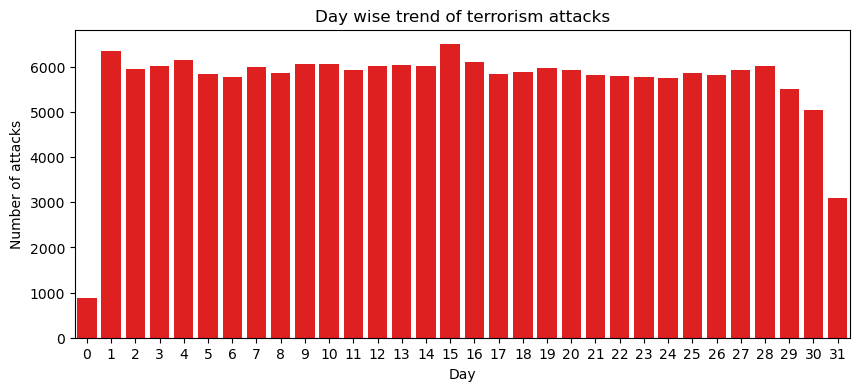

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(x='day', y='count', data = day_attacks, color='red')
plt.xlabel('Day')
plt.ylabel('Number of attacks')
plt.title('Day wise trend of terrorism attacks')
plt.show()

In [36]:
# As can be seen from the above visual, there's no impact of any specific day on occurrence of terrorist attacks.

## Extended

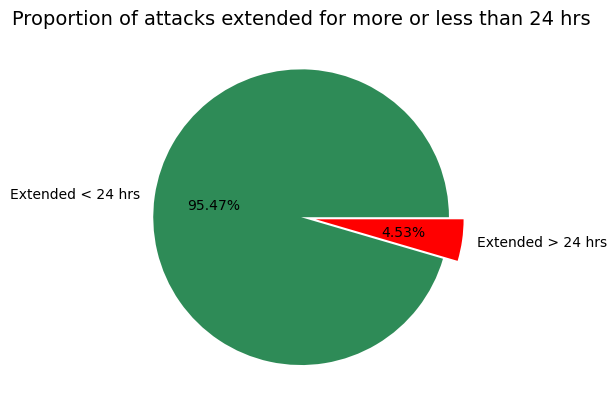

In [37]:
data = [df.extended.value_counts()[0], df.extended.value_counts()[1]]
keys = ["Extended < 24 hrs", "Extended > 24 hrs"]
explode = [0, 0.1]
palette_color = [ "seagreen", "red"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of attacks extended for more or less than 24 hrs", size = 14)
plt.show()

In [38]:
# Only 4.5% of the attacks extended for more than 24 hrs.

## Terrorist Attacks by Region

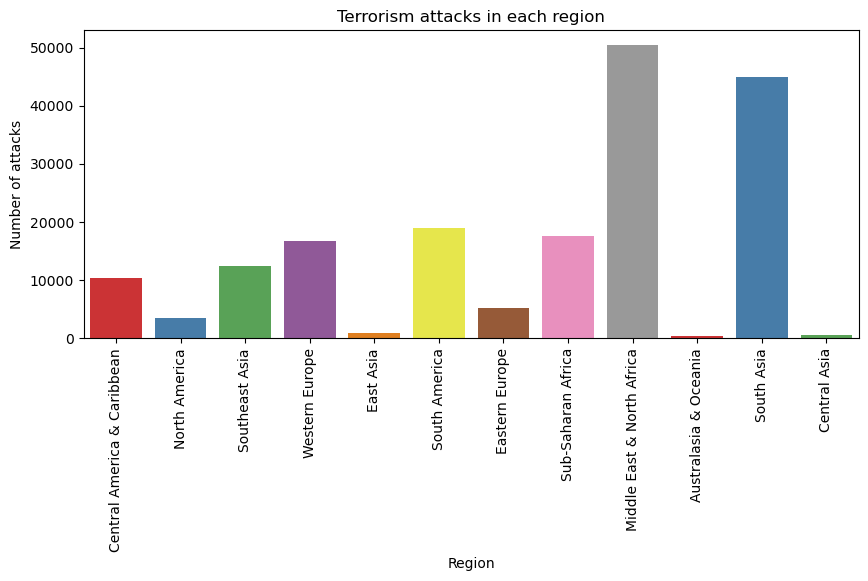

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(x='region', data = df, palette="Set1")
plt.xlabel('Region')
plt.ylabel('Number of attacks')
plt.title('Terrorism attacks in each region')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Middle East & North Africa, South Asia, South America, Sub-Saharan Africa and Western Europe are top the hotspots 
# of terrorism.

## Terrorist Attacks by Country

In [41]:
# Group the data by country and count the number of attacks
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts,locations='Country', locationmode='country names', color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country', color_continuous_scale='Reds')

fig.show()

### Countries with the maximum terrorist attacks

In [42]:
top_10_ctry = df.country.value_counts().head(10).reset_index().rename(columns={'index':'country', 'country': 'count'})

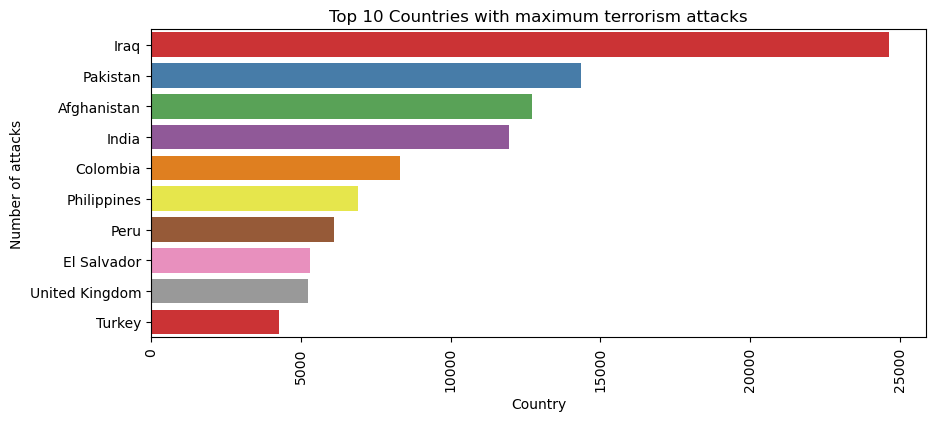

In [43]:
plt.figure(figsize=(10,4))
sns.barplot(y='country', x='count', data = top_10_ctry, palette = "Set1")
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.title('Top 10 Countries with maximum terrorism attacks')
plt.xticks(rotation=90)
plt.show()

In [44]:
# Iraq, Pakistan, Afganistan, India and Colombia are the top 5 hotspots of terrorism.

### Provinces/States with the maximum terrorist attacks

In [45]:
# finding top 10 Provinces/States with the maximum terrorist attacks
top_10_PS = df["province/state"].value_counts().head(11).reset_index().rename(columns=
                                {'index':'Province/State', 'province/state': 'Count'})

In [46]:
# excluding unknown provinces/states
top_10_PS = top_10_PS[top_10_PS['Province/State'] != "Unknown"]

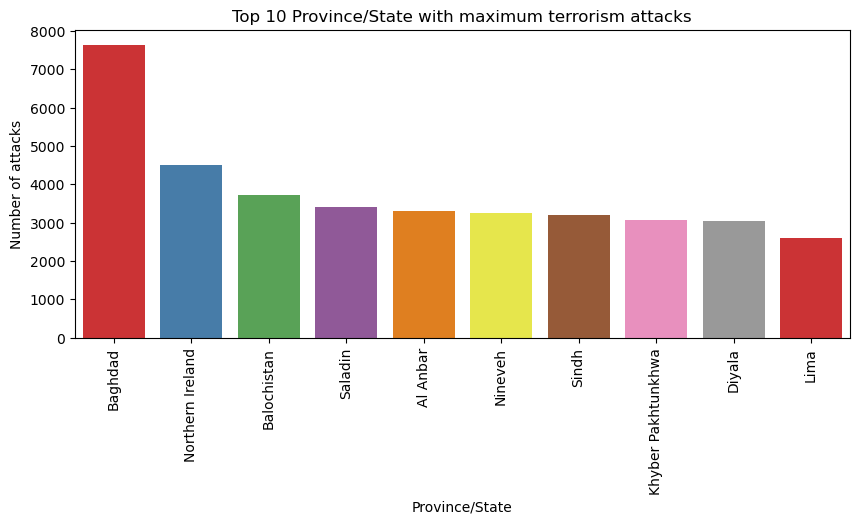

In [47]:
plt.figure(figsize=(10,4))
sns.barplot(x='Province/State', y='Count', data = top_10_PS, palette="Set1")
plt.xlabel('Province/State')
plt.ylabel('Number of attacks')
plt.title('Top 10 Province/State with maximum terrorism attacks')
plt.xticks(rotation=90)
plt.show()

In [48]:
# Baghdad, Northern Ireland, Balochistan, Saladin and Al Anbar are the provinces/states with maximum terrorism.

### Cities with the maximum terrorist attacks

In [49]:
# finding top 10 Cities with the maximum terrorist attacks
top_10_ct = df["city"].value_counts().head(11).reset_index().rename(columns={'index':'City', 'city': 'Count'})[1:]

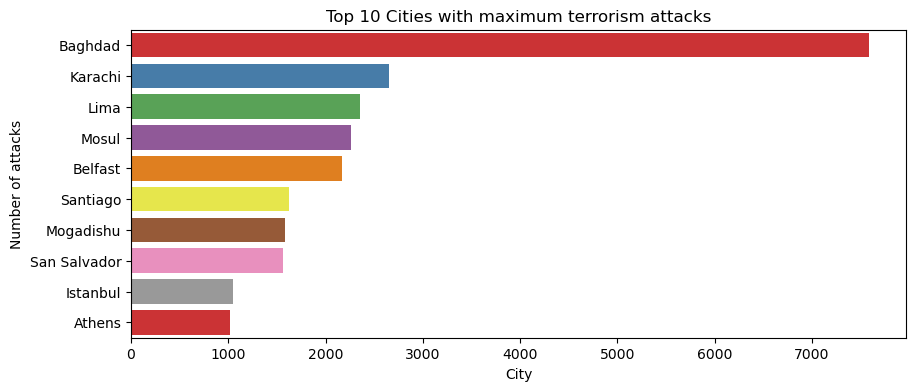

In [50]:
plt.figure(figsize=(10,4))
sns.barplot(y='City', x='Count', data = top_10_ct, palette='Set1')
plt.xlabel('City')
plt.ylabel('Number of attacks')
plt.title('Top 10 Cities with maximum terrorism attacks')
# plt.xticks(rotation=90)
plt.show()

In [51]:
# Baghdad, Karachi, Lima, Mosul and Belfast are considered to be the top cities with maximum terrorist attacks.

## Vicinity

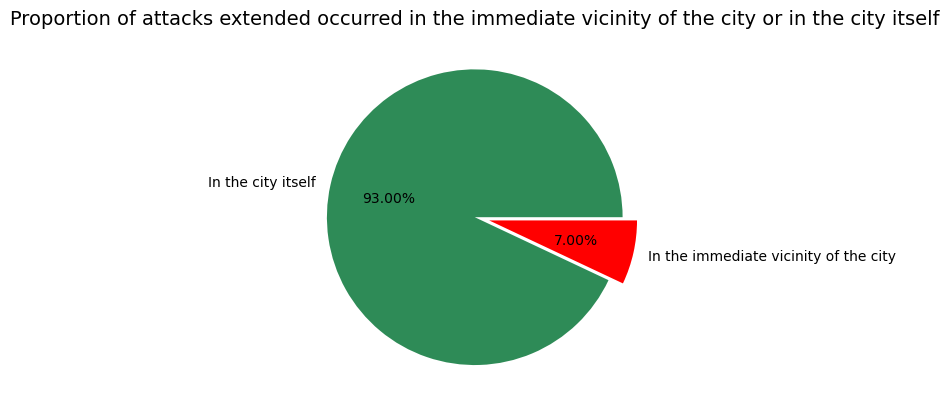

In [52]:
data = [df.vicinity.value_counts()[0], df.vicinity.value_counts()[1]]
keys = ["In the city itself", "In the immediate vicinity of the city"]
explode = [0, 0.1]
palette_color = [ "seagreen", "red"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of attacks extended occurred in the immediate vicinity of the city or in the city itself", size = 14)
plt.show()

In [53]:
#  Only 7% of the attacks took place in the immediate vicinity of the city.

## Summary

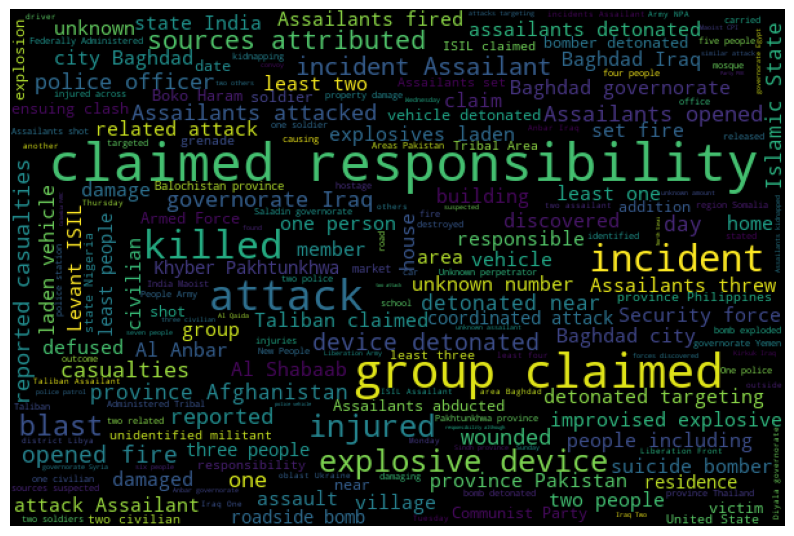

In [54]:
# visualizing the frequently used words for summary.

#  removing missing values to visualize summary
summary_df = df.summary.dropna()

plt.figure(figsize=(10,10))

wordcloud = WordCloud(background_color = 'black', width = 600, height = 400).generate(' '.join(summary_df))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Attack type

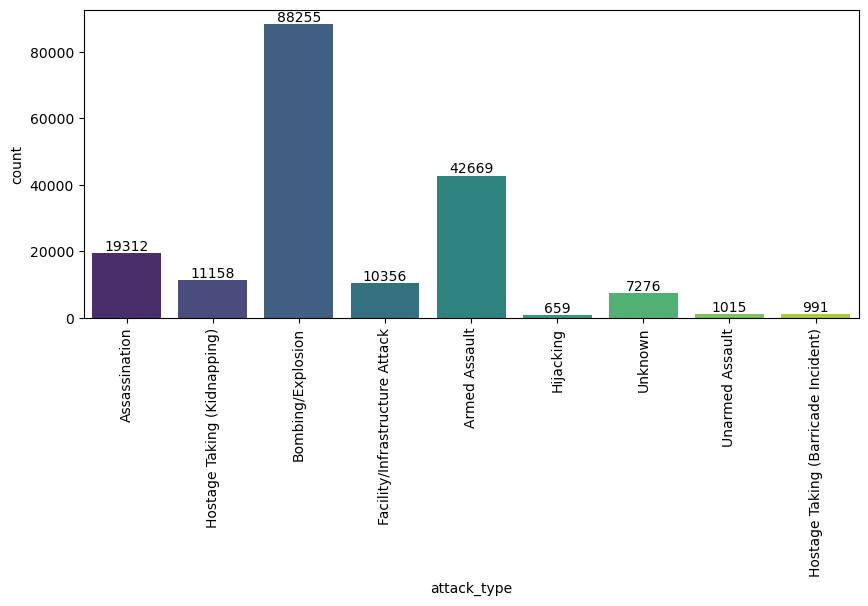

In [55]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x ='attack_type', data =df, palette="viridis")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [56]:
# Most of the times, Bombing/Explosion, followed by Armed Assault have been used for terrorist activities.

## Target type

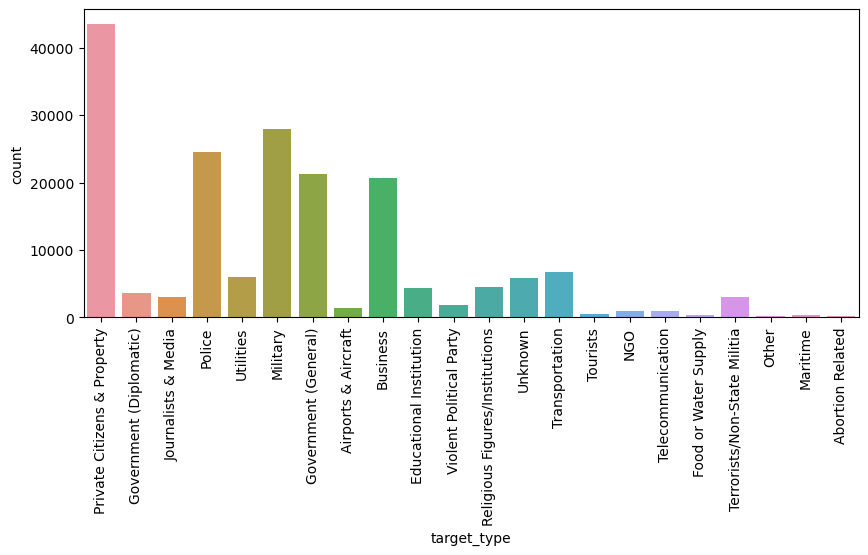

In [57]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x ='target_type', data =df)
plt.xticks(rotation=90)
plt.show()

In [58]:
# Private Citizens & Property, Military, Police, Government and Business are the most common targets of attacks.

## Suicide

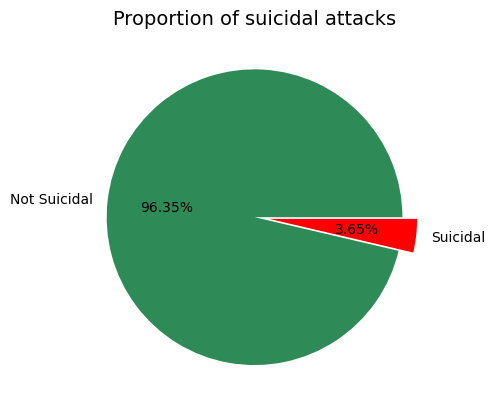

In [59]:
data = [df.suicide.value_counts()[0], df.suicide.value_counts()[1]]
keys = ["Not Suicidal", "Suicidal"]
explode = [0, 0.1]
palette_color = ["seagreen", "red"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of suicidal attacks", size = 14)
plt.show()

In [60]:
# Only 3.65% of the attacks are suicidal attacks.

### entity_targeted

In [61]:
# finding out top 10 entities which are specifically targetted 
top_10_et = df["entity_targeted"].value_counts().head(10).reset_index().rename(columns=
                                {'index':'Entity Targeted', 'entity_targeted': 'Count'})

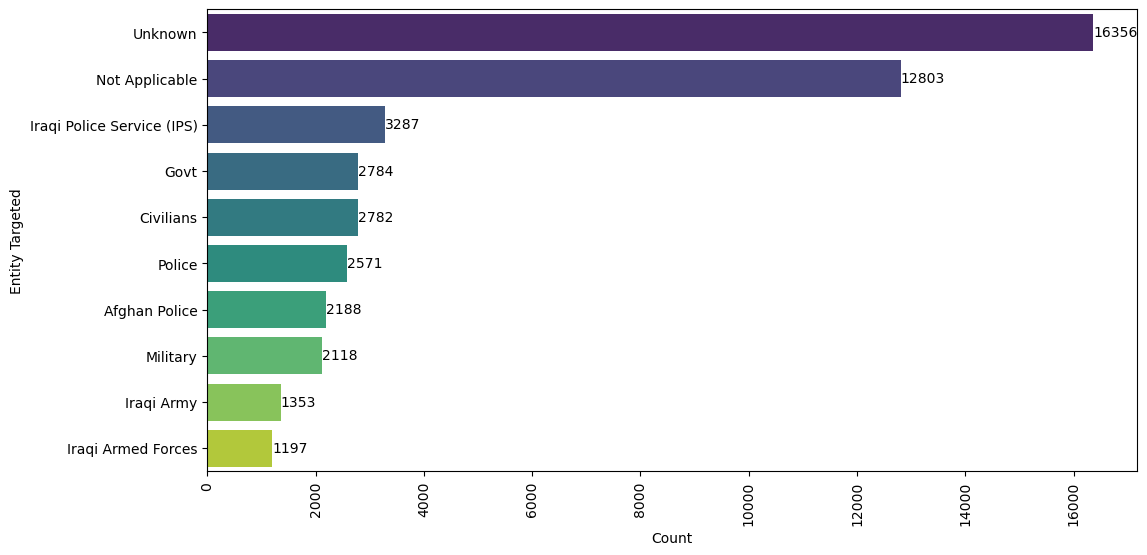

In [62]:
plt.figure(figsize=(12,6))
ax = sns.barplot(y ='Entity Targeted', x = 'Count', data = top_10_et, palette="viridis")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [63]:
# Out of all the attacks that are targetted on any specific entity, maximum are targetted on Iraqi Police Service, 
# Government, Police and Armed Forces.

### specific_target

In [64]:
# finding specific target of terrorist attacks
top_10_st = df["specific_target"].value_counts().head(10).reset_index().rename(columns=
                               {'index':'Specific Target', 'specific_target': 'Count'})

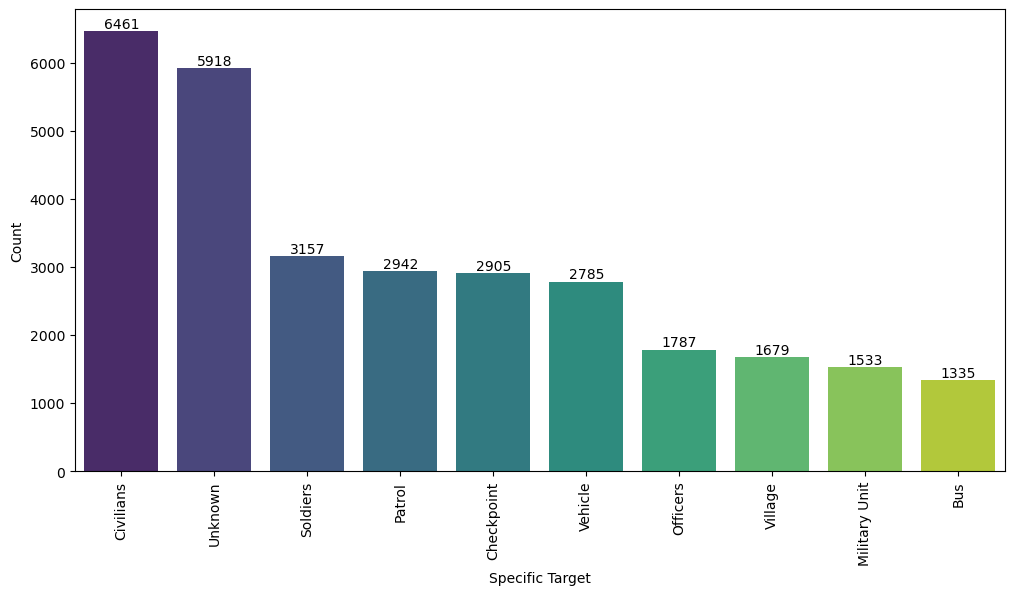

In [65]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x ='Specific Target', y = 'Count', data = top_10_st, palette="viridis")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [66]:
# Most of the times, Civilians were victims of these attacks.

### is_individual

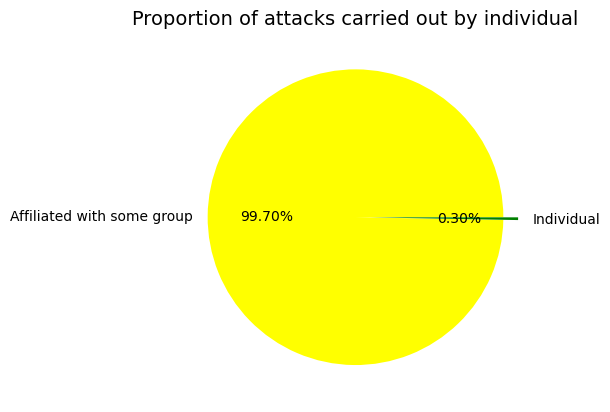

In [67]:
data = [df.is_individual.value_counts()[0], df.is_individual.value_counts()[1]]
keys = ["Affiliated with some group", "Individual"]
explode = [0, 0.1]
palette_color = ["yellow", "green"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of attacks carried out by individual", size = 14)
plt.show()

In [68]:
# Only less than 1% of the attacks were carried out by an individual and remaining were affiliated with specific groups.

### Terrorist Attacks by Nationalist

In [69]:
top_10_n = df["nationality"].value_counts().head(10).reset_index().rename(columns=
                                {'index':'Nationality', 'nationality': 'Count'})

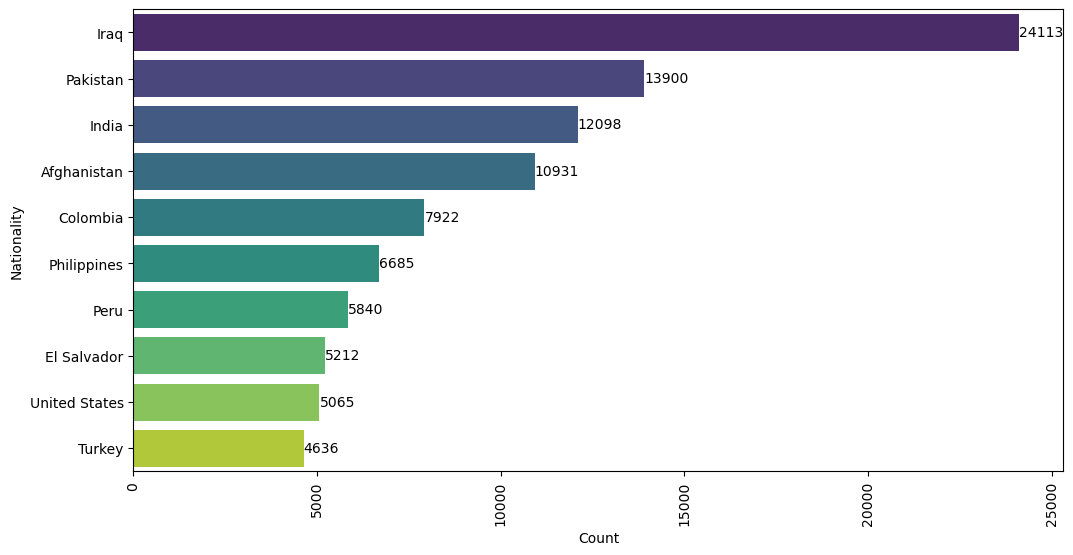

In [70]:
plt.figure(figsize=(12,6))
ax = sns.barplot(y ='Nationality', x = 'Count', data = top_10_n, palette='viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [71]:
# Nationalities which were attacked maximum number of times constitute Iraq, Pakistan, India and Afghanistan.

### group_name

In [72]:
top_10_gn = df["group_name"].value_counts().head(10).reset_index().rename(columns=
                                    {'index':'Group Name', 'group_name': 'Count'})

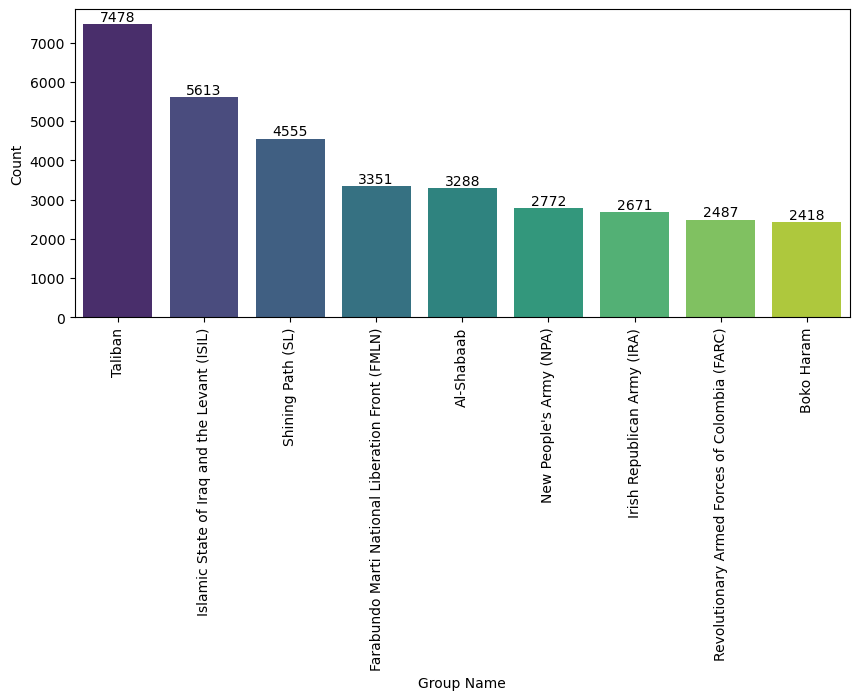

In [73]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x ='Group Name', y = 'Count', data = top_10_gn[1:], palette = 'viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [74]:
# Of the most active terrorist groups, Taliban tops the list, followed by ISIL, Shining Path and FMLN.

### weapon type

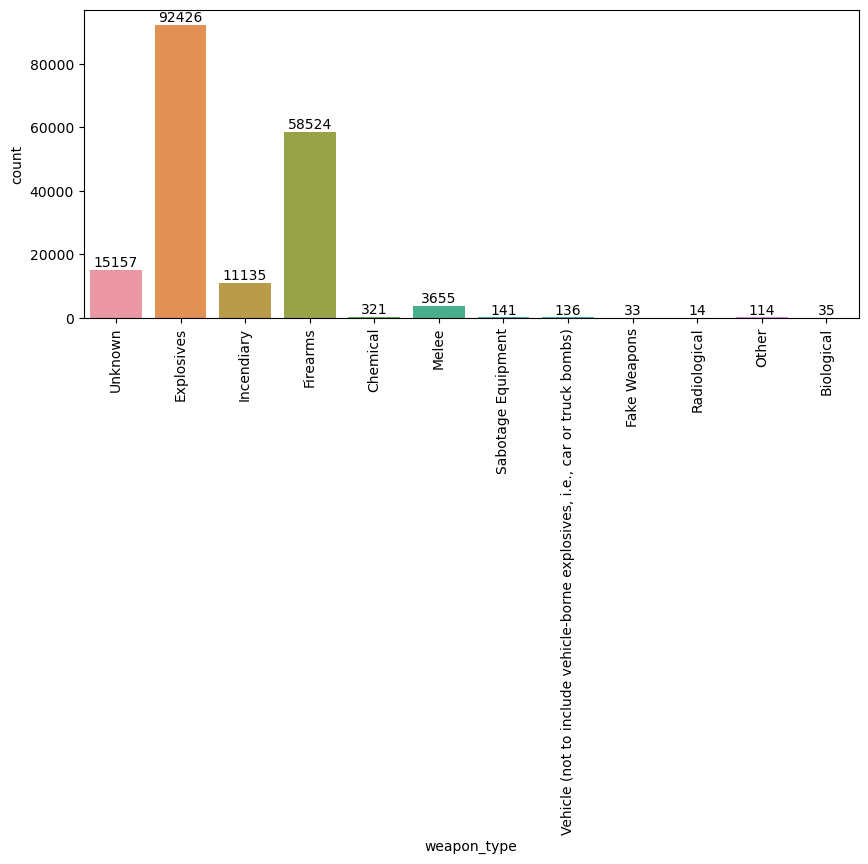

In [75]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x ='weapon_type', data = df)
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [76]:
# Explosives, followed by Firearms were used most of the times for attacks.

### Number of People killed

In [77]:
# Total Number of people killed in terror attack
killed = df.loc[:,'killed']
print('Number of people killed in terror attack:', int(sum(killed.dropna())))

Number of people killed in terror attack: 411868


### Number of People killed

In [78]:
# Total Number of people wounded in terror attack
wounded = df.loc[:,'wounded']
print('Number of people wounded in terror attack:', int(sum(wounded.dropna())))

Number of people wounded in terror attack: 523869


# Bivariate analysis

## Yearly analysis

##### Number of successful attacks in each Year

In [79]:
# creating dataframe of successful attacks only
success_df = df[df["success"] == 1]
y_success=success_df[["year","success"]].groupby("year").sum()

<Figure size 1200x1000 with 0 Axes>

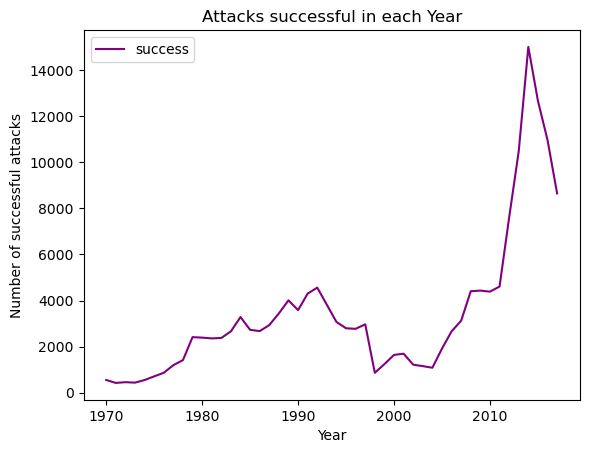

In [80]:
plt.figure(figsize=(12,10))
ax = y_success.plot(kind="line",color="purple")
ax.set_title("Attacks successful in each Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of successful attacks") 
plt.show()

##### Number of People Killed and Wounded in each Year

In [81]:
wounded=df[["year","wounded"]].groupby("year").sum()
killed=df[["year","killed"]].groupby("year").sum()

Text(0, 0.5, 'Number of People Wounded')

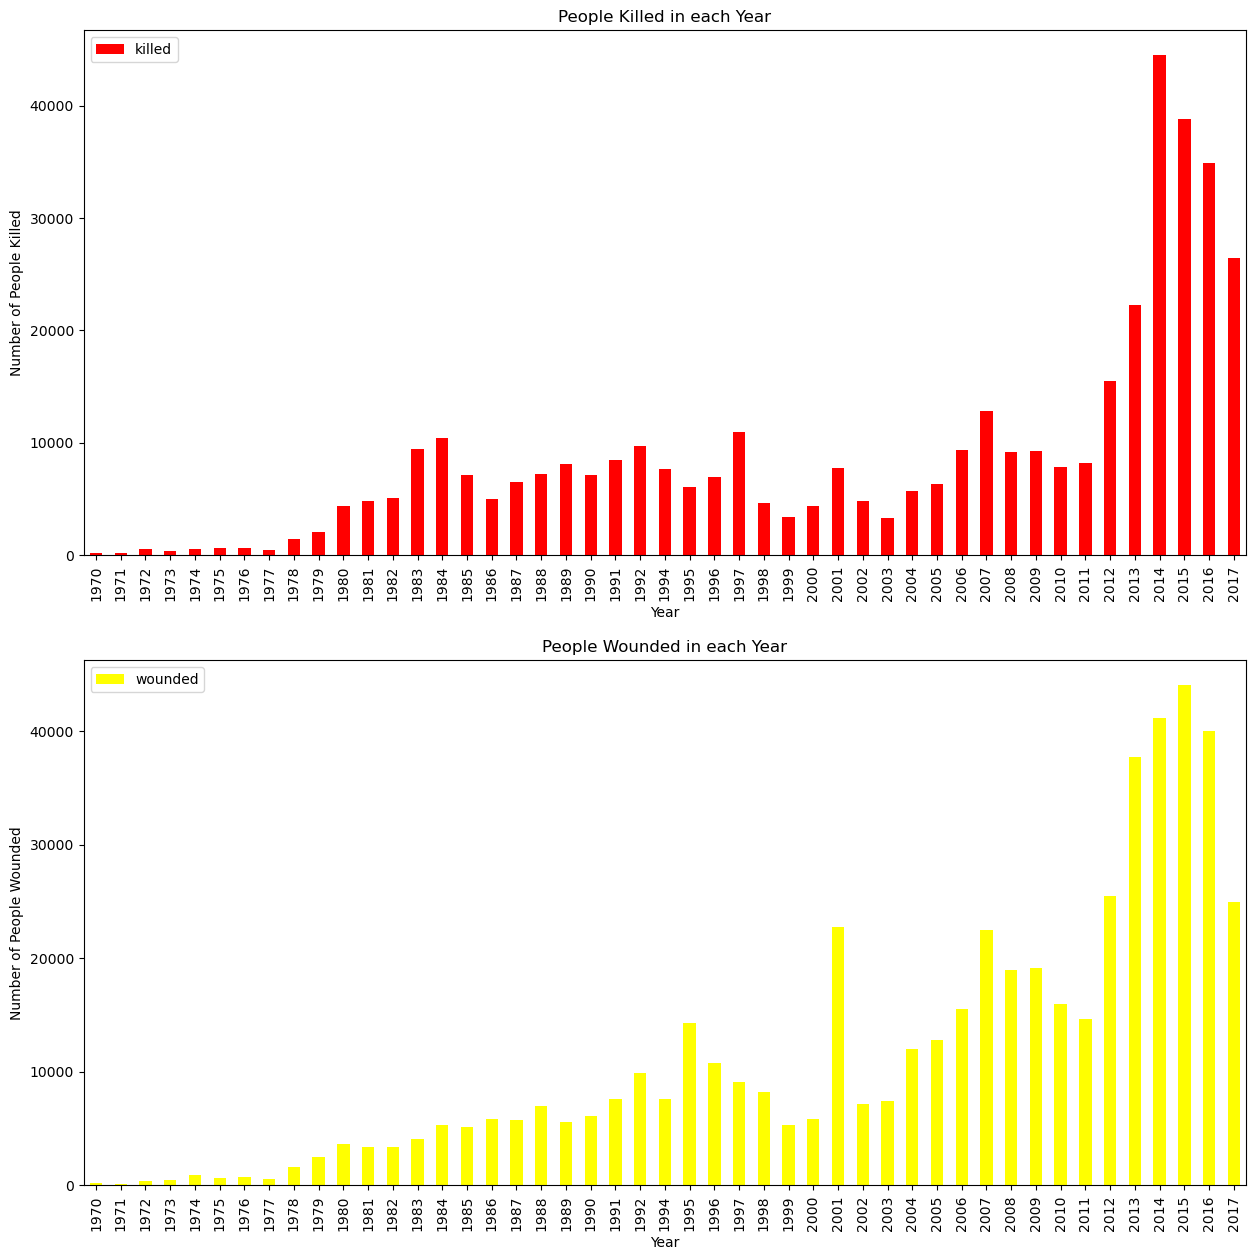

In [82]:
fig=plt.figure()
ax_k=fig.add_subplot(2,1,1)
ax_w=fig.add_subplot(2,1,2)

#Killed
killed.plot(kind="bar",color="red",figsize=(15,15),ax=ax_k)
ax_k.set_title("People Killed in each Year")
ax_k.set_xlabel("Year")
ax_k.set_ylabel("Number of People Killed") 

#Wounded
wounded.plot(kind="bar",color="yellow",figsize=(15,15),ax=ax_w)
ax_w.set_title("People Wounded in each Year")
ax_w.set_xlabel("Year")
ax_w.set_ylabel("Number of People Wounded")

### Most active group in each year

In [83]:
# selecting top 10 active groups
most_active = df[df['group_name'].isin(top_10_gn['Group Name'].tolist())]

In [84]:
active_group_year = pd.crosstab(most_active['year'], most_active['group_name'])
active_group_year.drop("Unknown", axis=1,inplace=True)  # removing unknown groups

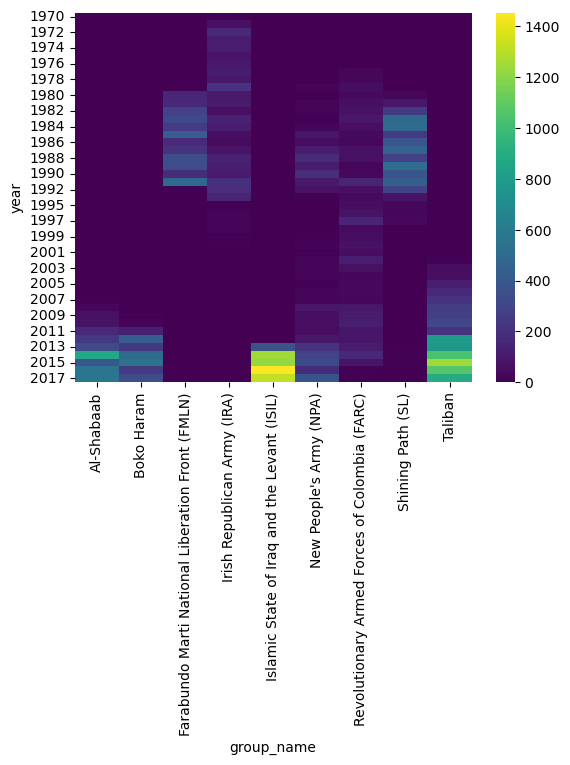

In [85]:
# visualizing 
sns.heatmap(active_group_year, cmap='viridis')
plt.show()

In [86]:
# ISIL was the most active group in the years 2014-2017, followed by Taliban.

## Regional Analysis

##### Successful attacks in each region

In [87]:
reg_success=success_df[["region","success"]].groupby("region").sum()

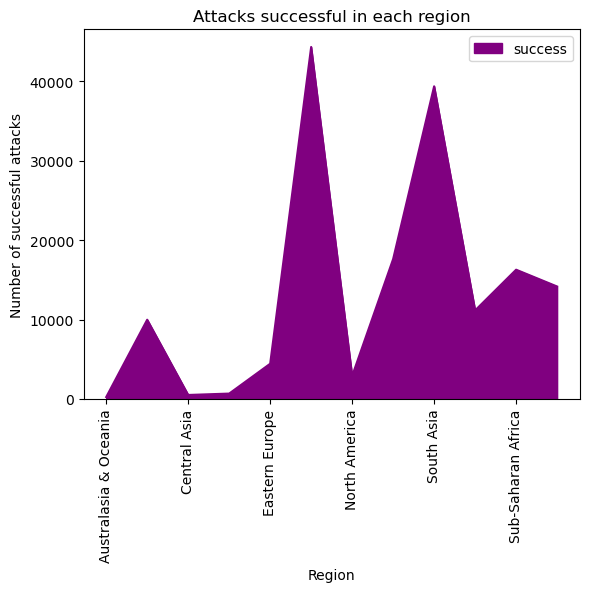

In [88]:
ax = reg_success.plot(kind="area", color = 'purple')
ax.set_title("Attacks successful in each region")
ax.set_xlabel("Region")
ax.set_ylabel("Number of successful attacks")
plt.xticks(rotation=90)
plt.show()

##### People killed and wounded in each region

In [89]:
r_wounded=df[["region","wounded"]].groupby("region").sum()
r_killed=df[["region","killed"]].groupby("region").sum()

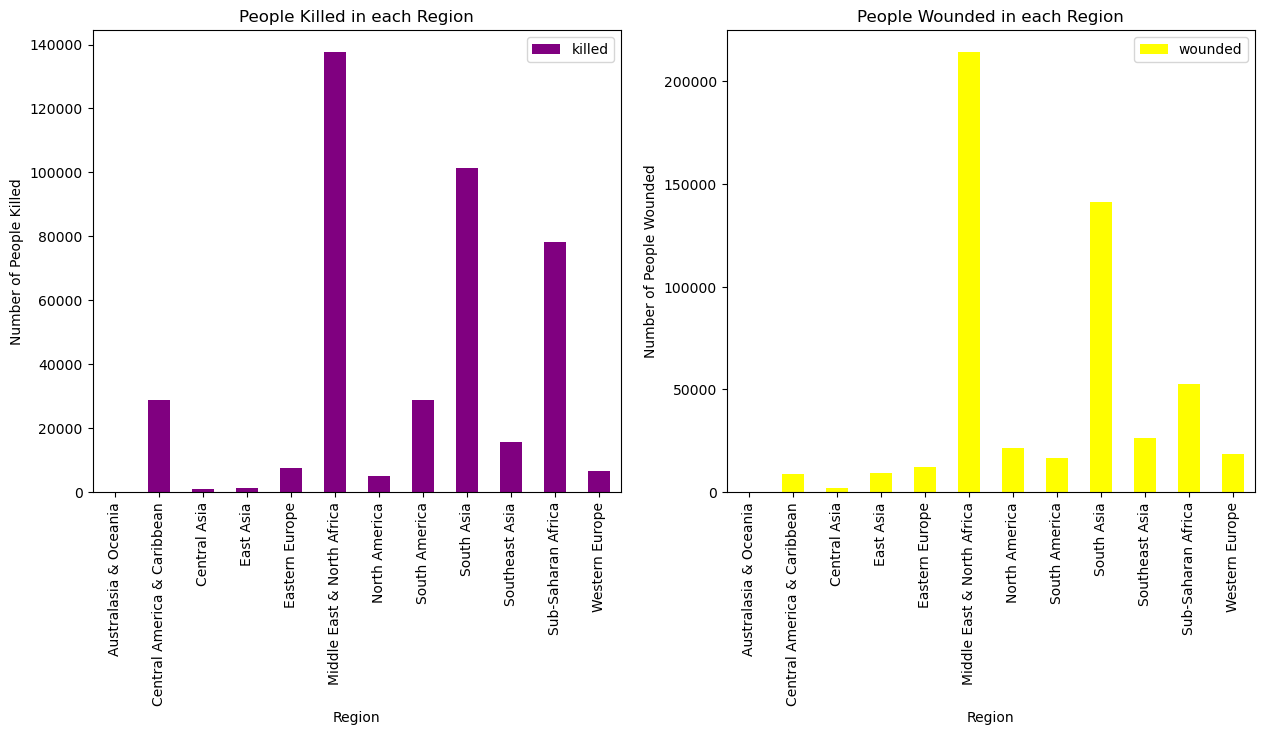

In [90]:
fig=plt.figure()
ax_k=fig.add_subplot(1,2,1)
ax_w=fig.add_subplot(1,2,2)

#Killed
r_killed.plot(kind="bar",color="purple",figsize=(15,6),ax=ax_k)
ax_k.set_title("People Killed in each Region")
ax_k.set_xlabel("Region")
ax_k.set_ylabel("Number of People Killed")


#Wounded
r_wounded.plot(kind="bar",color="yellow",figsize=(15,6),ax=ax_w)
ax_w.set_title("People Wounded in each Region")
ax_w.set_xlabel("Region")
ax_w.set_ylabel("Number of People Wounded")
plt.show()

##### Attack type in each region

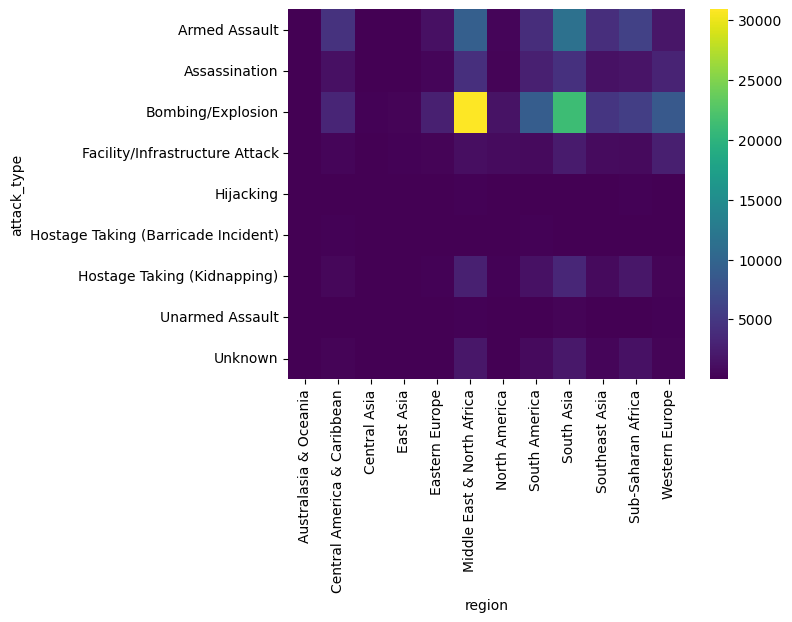

In [91]:
type_reg = pd.crosstab(df["attack_type"], df["region"])
sns.heatmap(type_reg, cmap='viridis')
plt.show()

In [92]:
# Bombing/Explosion was used most frequently in Middle East & North America and South Asia.

##### Attack on nationality in each region

In [93]:
most_nat_attacked = df[df['nationality'].isin(top_10_n['Nationality'].tolist())]

In [94]:
reg_df = pd.crosstab(most_nat_attacked["region"], most_nat_attacked["nationality"])
reg_df.style.background_gradient(cmap="viridis")

In [95]:
# Iraq got attacked maximum number of times in Middle East  & North America, followed by Pakistan, India and 
# Afganistan in South Asia.

##### Attack on entity in each region

In [96]:
top_10_et = df.entity_targeted.value_counts().head(11).reset_index(name='count')[1:]
most_entity_attacked = df[df['entity_targeted'].isin(top_10_et['index'].tolist())]

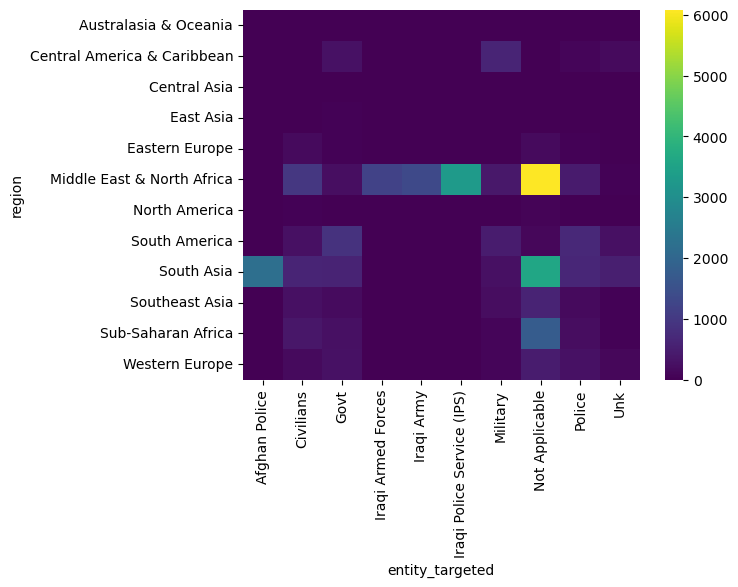

In [97]:
et = pd.crosstab(most_entity_attacked["region"], most_entity_attacked["entity_targeted"])
sns.heatmap(et, cmap='viridis')
plt.show()

### Country Wise Analysis

##### Successful attacks in each country

In [100]:
# considering only top 10 countries with maximum attacks
most_ctr = df[df['country'].isin(top_10_ctry['country'].tolist())]
ctr_success=most_ctr[["country","success"]].groupby("country").sum().reset_index()

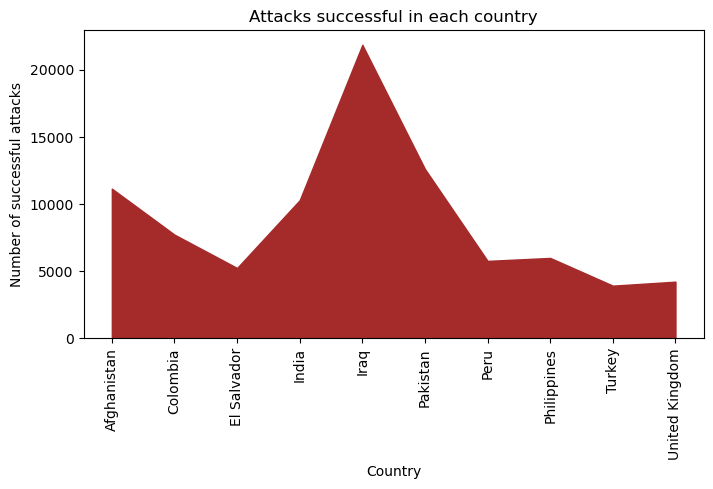

In [101]:
plt.figure(figsize=(8,4))
plt.stackplot(ctr_success.country, ctr_success.success, color= 'brown')
plt.xticks(rotation=90)
plt.title("Attacks successful in each country")
plt.xlabel("Country")
plt.ylabel("Number of successful attacks")
plt.show()

##### People killed and wounded in each country

In [102]:
c_wounded=most_ctr[["country","wounded"]].groupby("country").sum()
c_killed=most_ctr[["country","killed"]].groupby("country").sum()

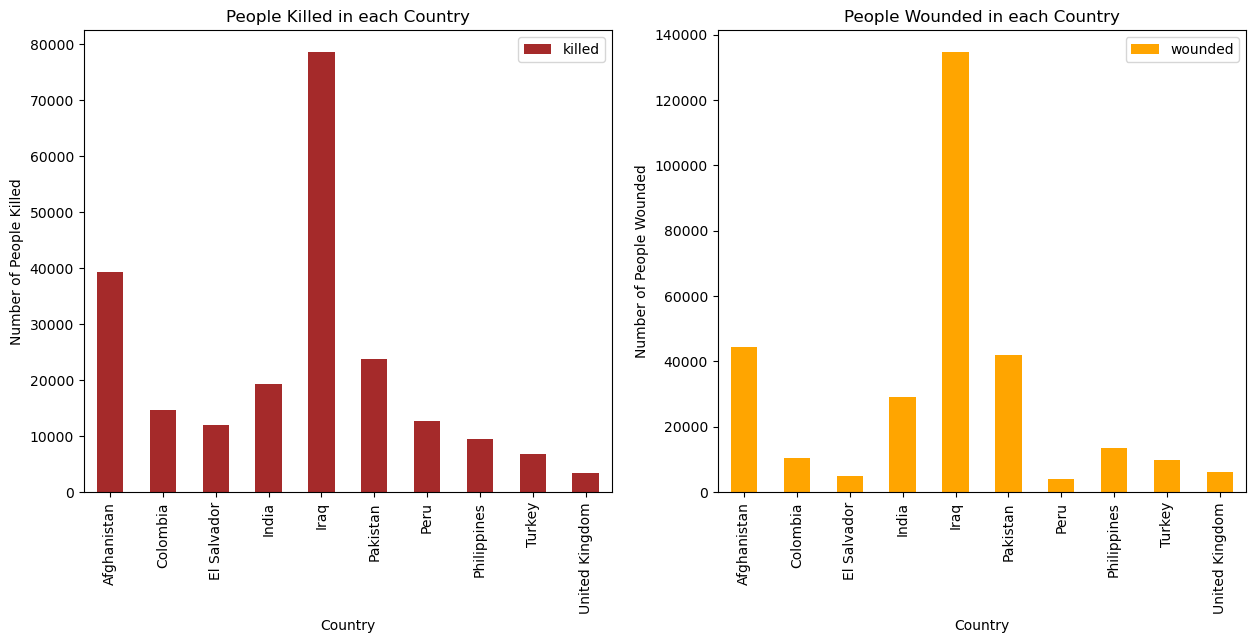

In [103]:
fig=plt.figure()
ax_k=fig.add_subplot(1,2,1)
ax_w=fig.add_subplot(1,2,2)

#Killed
c_killed.plot(kind="bar",color="brown",figsize=(15,6),ax=ax_k)
ax_k.set_title("People Killed in each Country")
ax_k.set_xlabel("Country")
ax_k.set_ylabel("Number of People Killed")


#Wounded
c_wounded.plot(kind="bar",color="orange",figsize=(15,6),ax=ax_w)
ax_w.set_title("People Wounded in each Country")
ax_w.set_xlabel("Country")
ax_w.set_ylabel("Number of People Wounded")
plt.show()

##### Attack type used in each country

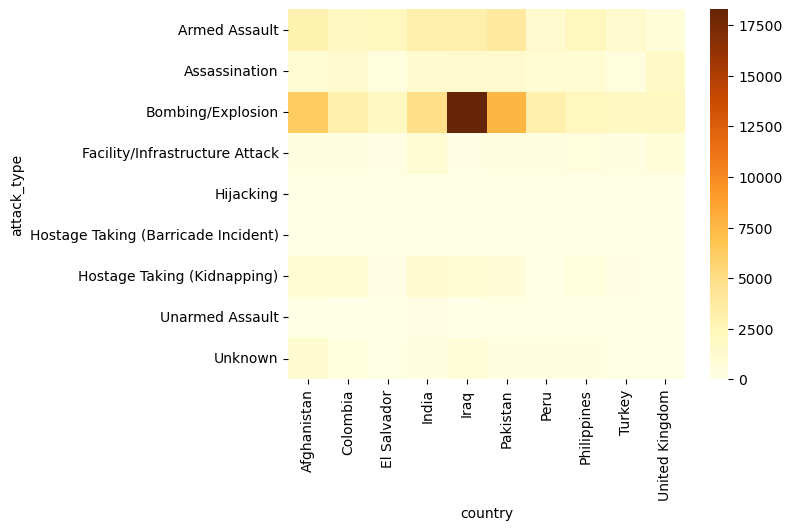

In [106]:
ctr_df = df[df['country'].isin(top_10_ctry['country'].tolist())]
type_ctr = pd.crosstab(ctr_df["attack_type"], ctr_df["country"])
sns.heatmap(type_ctr, cmap='YlOrBr')
plt.show()

##### Attack on nationality in each country

In [107]:
most_nat_attacked = df[df['nationality'].isin(top_10_n['Nationality'].tolist())]
most_nat_attacked= most_nat_attacked[most_nat_attacked['country'].isin(top_10_ctry['country'].tolist())]

In [108]:
ctry = pd.crosstab(most_nat_attacked["country"], most_nat_attacked["nationality"])
ctry.style.background_gradient(cmap='YlOrBr')

##### Attack on entity in each country

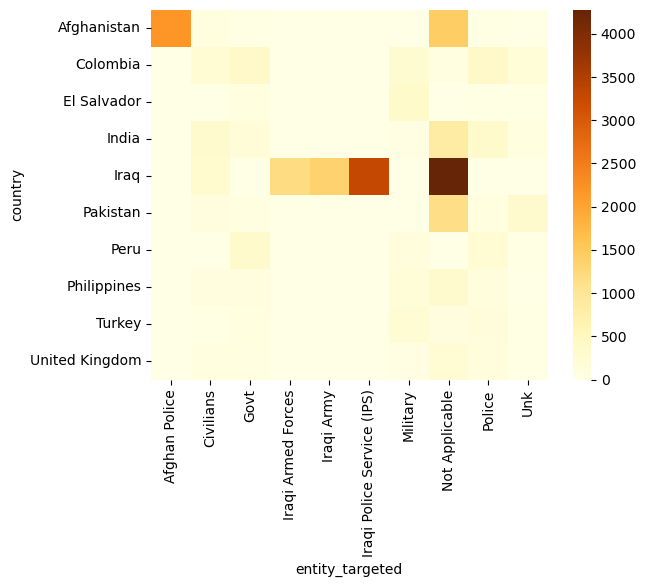

In [109]:
most_entity_attacked= most_entity_attacked[most_entity_attacked['country'].isin(top_10_ctry['country'].tolist())]
et = pd.crosstab(most_entity_attacked["country"], most_entity_attacked["entity_targeted"])
sns.heatmap(et, cmap='YlOrBr')
plt.show()

## Province/State wise analysis

##### Successful attacks in each province/state

In [110]:
# considering only top 10 provinces/states with maximum attacks
most_ps = df[df['province/state'].isin(top_10_PS['Province/State'].tolist())]
ps_success = most_ps[["province/state","success"]].groupby("province/state").sum().reset_index()

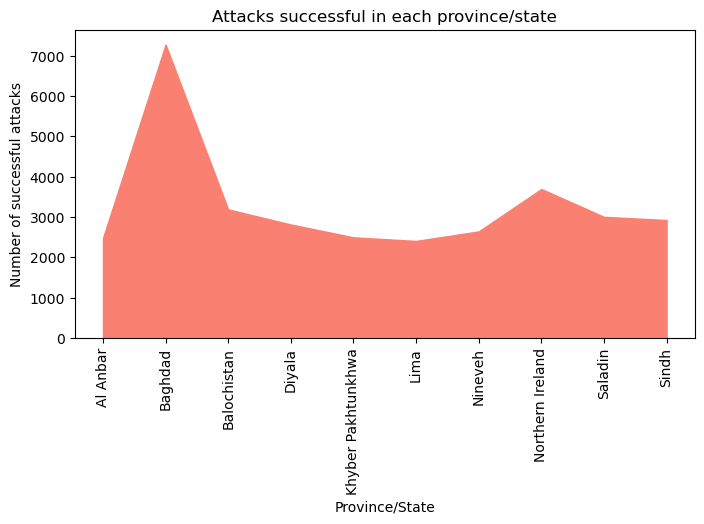

In [111]:
plt.figure(figsize=(8,4))
plt.stackplot(ps_success['province/state'], ps_success.success, color= 'salmon')
plt.xticks(rotation=90)
plt.title("Attacks successful in each province/state")
plt.xlabel("Province/State")
plt.ylabel("Number of successful attacks")
plt.show()

##### People killed and wounded in each province/state

In [112]:
ps_wounded=most_ps[["province/state","wounded"]].groupby("province/state").sum()
ps_killed=most_ps[["province/state","killed"]].groupby("province/state").sum()

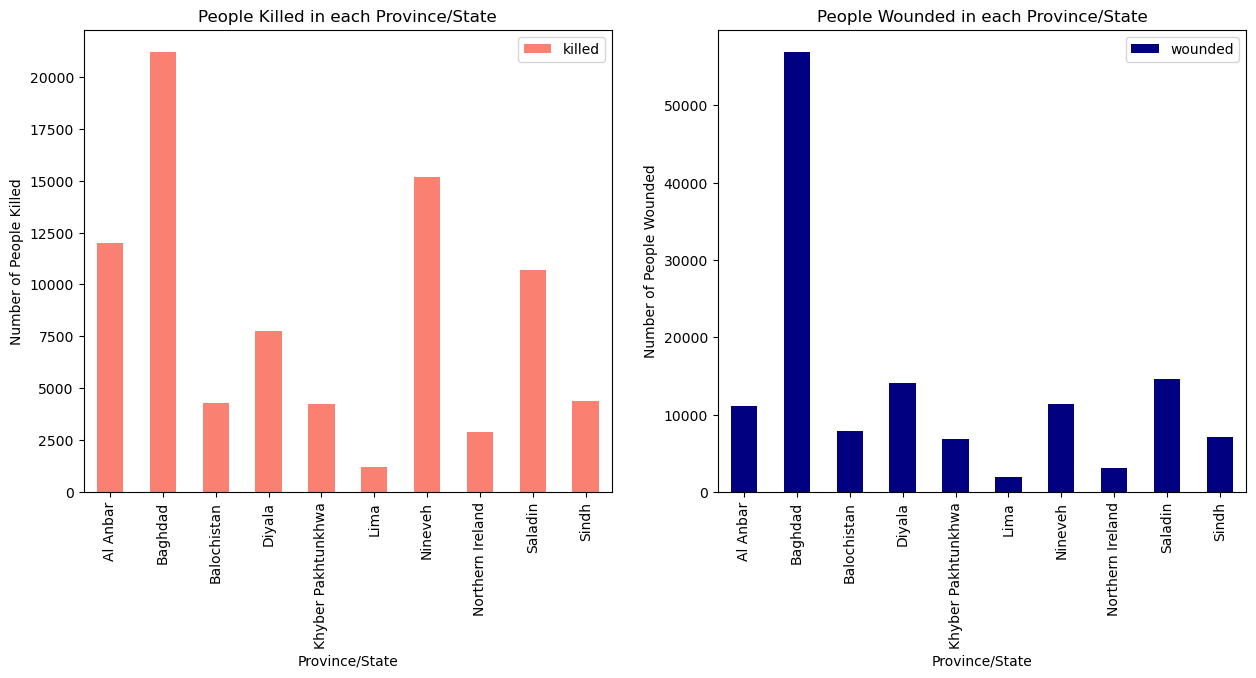

In [113]:
fig=plt.figure()
ax_k=fig.add_subplot(1,2,1)
ax_w=fig.add_subplot(1,2,2)

#Killed
ps_killed.plot(kind="bar",color="salmon",figsize=(15,6),ax=ax_k)
ax_k.set_title("People Killed in each Province/State")
ax_k.set_xlabel("Province/State")
ax_k.set_ylabel("Number of People Killed")


#Wounded
ps_wounded.plot(kind="bar",color="navy",figsize=(15,6),ax=ax_w)
ax_w.set_title("People Wounded in each Province/State")
ax_w.set_xlabel("Province/State")
ax_w.set_ylabel("Number of People Wounded")
plt.show()

##### Attack type used in each province/state

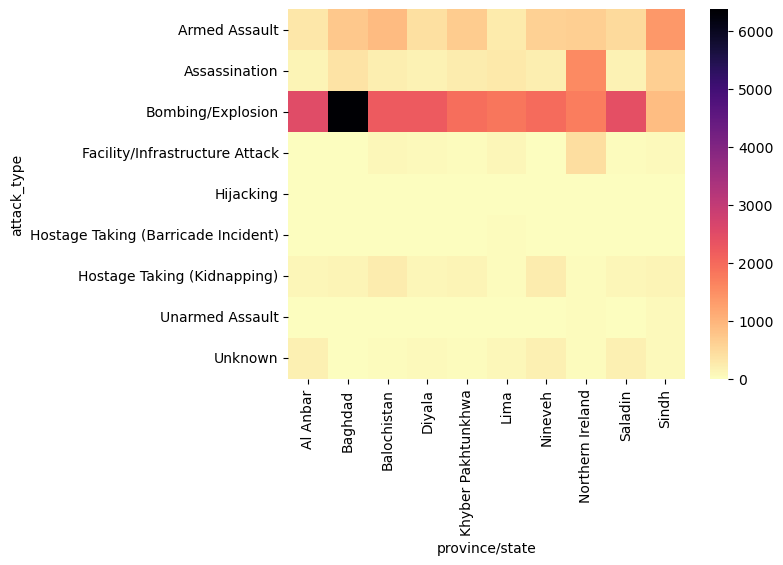

In [114]:
type_ps = pd.crosstab(most_ps["attack_type"], most_ps["province/state"])
sns.heatmap(type_ps, cmap='magma_r')
plt.show()

##### Attack on nationality in each province/state

In [115]:
most_nat_attacked = df[df['nationality'].isin(top_10_n['Nationality'].tolist())]
most_nat_attacked= most_nat_attacked[most_nat_attacked['province/state'].isin(most_ps['province/state'].tolist())]
ps = pd.crosstab(most_nat_attacked["province/state"], most_nat_attacked["nationality"])
ps.style.background_gradient(cmap='magma_r')

##### Attack on entity in each province/state

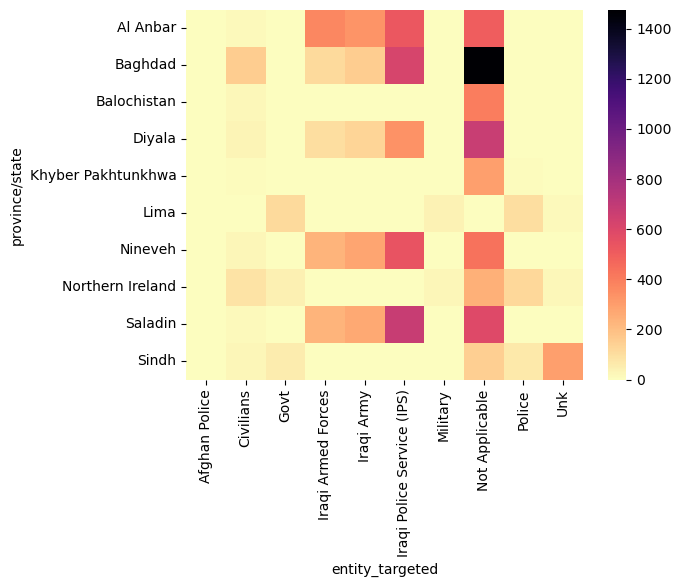

In [116]:
most_entity_attacked= most_entity_attacked[most_entity_attacked['province/state'].isin(most_ps['province/state'].tolist())]
et = pd.crosstab(most_entity_attacked["province/state"], most_entity_attacked["entity_targeted"])
sns.heatmap(et, cmap='magma_r')
plt.show()

## City wise analysis

In [117]:
# considering only top 10 cities with maximum attacks
most_cts = df[df['city'].isin(top_10_ct['City'].tolist())]
cts_success=most_cts[["city","success"]].groupby("city").sum().reset_index()

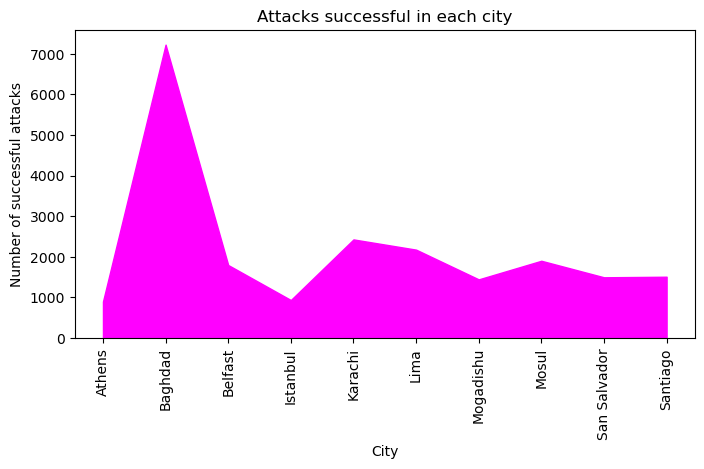

In [118]:
plt.figure(figsize=(8,4))
plt.stackplot(cts_success.city, cts_success.success, color= 'magenta')
plt.xticks(rotation=90)
plt.title("Attacks successful in each city")
plt.xlabel("City")
plt.ylabel("Number of successful attacks")
plt.show()

##### People killed and wounded in each city

In [119]:
ct_wounded=most_cts[["city","wounded"]].groupby("city").sum()
ct_killed=most_cts[["city","killed"]].groupby("city").sum()

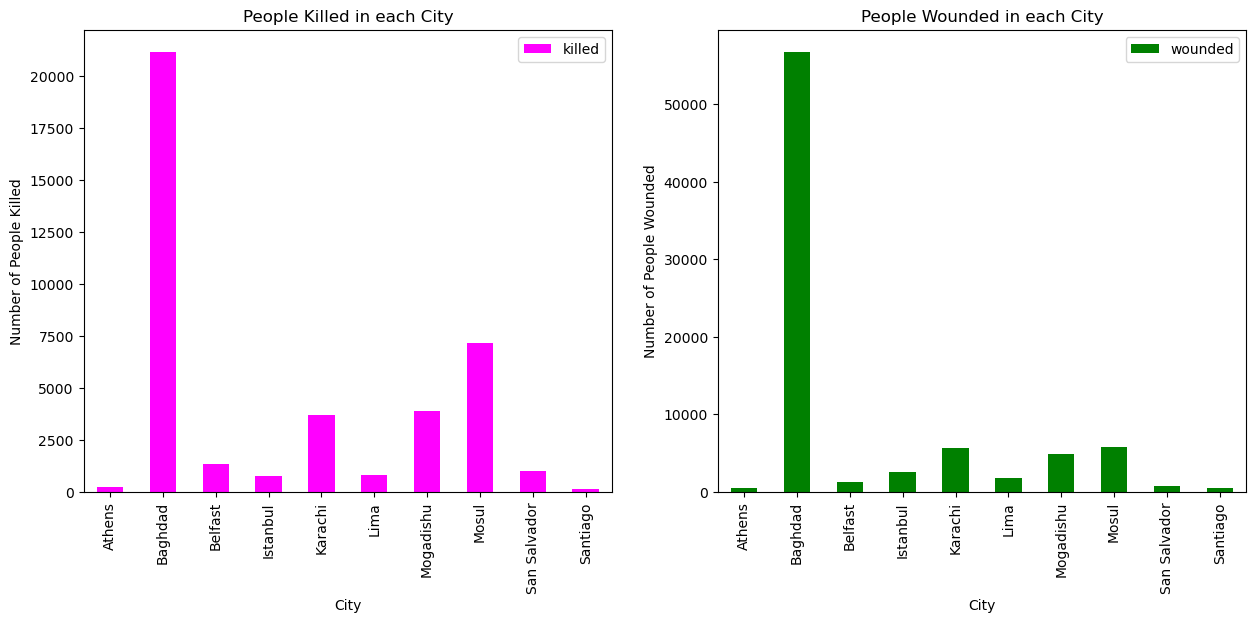

In [120]:
fig=plt.figure()
ax_k=fig.add_subplot(1,2,1)
ax_w=fig.add_subplot(1,2,2)

#Killed
ct_killed.plot(kind="bar",color="magenta",figsize=(15,6),ax=ax_k)
ax_k.set_title("People Killed in each City")
ax_k.set_xlabel("City")
ax_k.set_ylabel("Number of People Killed")


#Wounded
ct_wounded.plot(kind="bar",color="green",figsize=(15,6),ax=ax_w)
ax_w.set_title("People Wounded in each City")
ax_w.set_xlabel("City")
ax_w.set_ylabel("Number of People Wounded")
plt.show()

##### Attack type used in each city

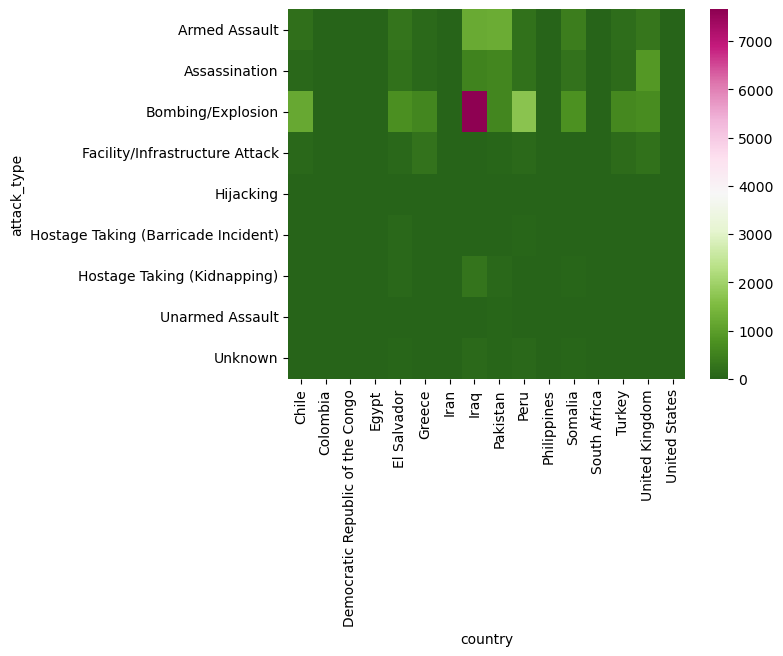

In [121]:
type_cts = pd.crosstab(most_cts["attack_type"], most_cts["country"])
sns.heatmap(type_cts, cmap='PiYG_r')
plt.show()

##### Attack on nationality in each city

In [122]:
most_nat_attacked = df[df['nationality'].isin(top_10_n['Nationality'].tolist())]
most_nat_attacked= most_nat_attacked[most_nat_attacked['city'].isin(most_cts['city'].tolist())]
cts = pd.crosstab(most_nat_attacked["city"], most_nat_attacked["nationality"])
cts.style.background_gradient(cmap='PiYG')

##### Attack on entity in each city

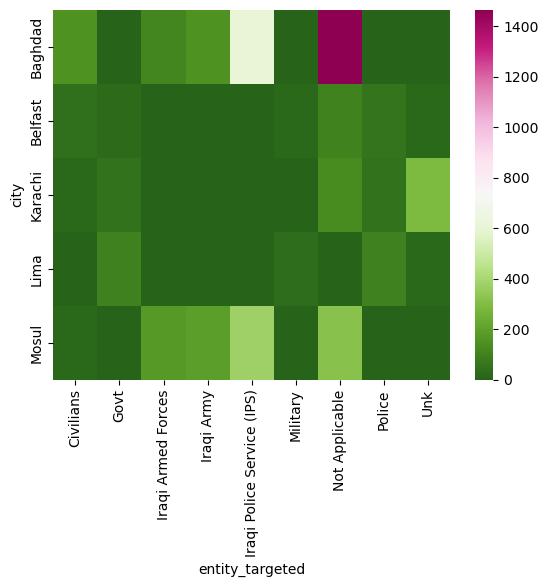

In [123]:
most_entity_attacked= most_entity_attacked[most_entity_attacked['city'].isin(most_cts['city'].tolist())]
et = pd.crosstab(most_entity_attacked["city"], most_entity_attacked["entity_targeted"])
sns.heatmap(et, cmap='PiYG_r')
plt.show()

## Multivariate Analysis

### Finding out the hotzones of terrorism

In [124]:
# considering regions with maximum attacks
top_reg = df.region.value_counts().head(6).reset_index().rename(columns={'index':'Region', 'region': 'Count'})

# dataframe with top 6 regions
region_df = df[df["region"].isin(top_reg["Region"].tolist())]

In [125]:
# considering countries with maximum attacks
top_ctry = df['country'].value_counts().head(6).reset_index().rename(columns=
                                                                {'index':'Country', 'country': 'Count'})

In [126]:
# considering province/state with maximum attacks
top_ps = df['province/state'].value_counts().head(6).reset_index().rename(columns=
                                                                {'index':'province/state', 'province/state': 'Count'})
# not considering unknown category
top_ps = top_ps[top_ps["province/state"] != "Unknown"]

In [127]:
# considering cities with maximum attacks
top_ct = df['city'].value_counts().head(6).reset_index().rename(columns={'index':'city', 'city': 'Count'})[1:]

### Final Dataframe to find out hot zones

In [128]:
## final dataframe with all the filtered categories
final_df = region_df[((region_df["country"].isin(top_ctry["Country"].tolist())) | (region_df["province/state"].isin(top_ps["province/state"].tolist())) | (region_df["city"].isin(top_ct["city"].tolist())))]

In [129]:
final_df.head()

year    month  day  extended      country          region  \
2    1970  January    0         0  Philippines  Southeast Asia   
26   1970  January   21         0  Philippines  Southeast Asia   
39   1970  January   31         0  Philippines  Southeast Asia   
96   1970    March    0         0  Philippines  Southeast Asia   
150  1970    March   24         0  Philippines  Southeast Asia   

           province/state         city  vicinity summary  success  suicide  \
2                  Tarlac      Unknown         0     NaN        1        0   
26    Metropolitan Manila  Quezon City         0     NaN        1        0   
39                 Tarlac       Bamban         0     NaN        0        0   
96   Metropolitian Manila       Manila         0     NaN        1        0   
150              Pampanga      Angeles         0     NaN        1        0   

           attack_type              target_type   entity_targeted  \
2        Assassination      Journalists & Media  Voice of America   
26   Bombing/Explosion  Government (Diplomatic)               NaN   
39             Unknown                 Military         U.S. Navy   
96   Bombing/Explosion  Government (Diplomatic)               NaN   
150            Unknown                 Military    U.S. Air Force   

    specific_target    nationality               group_name  is_individual  \
2          Employee  United States                  Unknown              0   
26        JUSMAG HQ  United States                  Unknown              0   
39           Seaman  United States  New People's Army (NPA)              0   
96     U.S. Embassy  United States                  Unknown              0   
150         officer  United States                  Unknown              0   

    weapon_type  killed  wounded  is_property_damaged  
2       Unknown     1.0      0.0                    0  
26   Explosives     0.0      0.0                    1  
39      Unknown     0.0      1.0                    0  
96   Explosives     0.0      0.0                    1  
150     Unknown     1.0      0.0                    0

### Visualizing Region and Country

In [130]:
table_country = final_df.groupby(['region', 'country']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)    

table_country.style.background_gradient()

**Hot zones -** 

In [131]:
country_list = ["Iraq", "Pakistan", "Afghanistan", "India", "Colombia"]

### Analyzing each country with maximum attacks for province/state 

### Iraq

In [132]:
Iraq_df = final_df[final_df["country"]=='Iraq']
Iraq_table = Iraq_df.groupby(['country', 'province/state']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

Iraq_table.style.background_gradient(cmap = 'Reds')

### Pakistan

In [133]:
Pakistan_df = final_df[final_df["country"]=='Pakistan']
Pakistan_table = Pakistan_df.groupby(['country', 'province/state']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

Pakistan_table.style.background_gradient(cmap='Reds')

### Afghanistan

In [134]:
Afghanistan_df = final_df[final_df["country"]=='Afghanistan']
Afghanistan_table = Afghanistan_df.groupby(['country', 'province/state']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

Afghanistan_table.style.background_gradient(cmap='Reds')

### India

In [135]:
India_df = final_df[final_df["country"]=='India']
India_table = India_df.groupby(['country', 'province/state']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

India_table.style.background_gradient(cmap='Reds')

### Colombia

In [136]:
Colombia_df = final_df[final_df["country"]=='Colombia']
Colombia_table = Colombia_df.groupby(['country', 'province/state']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

Colombia_table.style.background_gradient(cmap='Reds')

**Hot zones -**

In [137]:
state_list =  ['Baghdad', 'Nineveh', 'Balochistan', 'Sindh', 'Helmand','Kandahar', 'Jammu and Kashmir', 'Antioquia']

### Analyzing each province/state with maximum attacks for city

In [138]:
city_df = final_df[final_df['province/state'].isin(state_list)]
city_table = city_df.groupby(['province/state', 'city']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

city_table.style.background_gradient(cmap='Reds')

**Hot zones-**

In [139]:
city_list = ['Medellin', 'Baghdad', 'Quetta', 'Srinagar', 'Mosul', 'Karachi', 'Kandahar']

<h1 ><center><b>Hot Zones Of Terrorism</b></center></h1>

In [140]:
hot_zones = final_df[((final_df['country'].isin(country_list)) & (final_df['province/state'].isin(state_list)) & (final_df['city'].isin(city_list)))]


hot_zones_table = hot_zones.groupby(['region', 'country', 'province/state', 'city']).agg(
    Count_of_attacks = ('year', 'count'),
    Num_people_killed = ('killed', 'sum'),
    Num_people_wounded = ('wounded', 'sum')
)

hot_zones_table.style.background_gradient(cmap='Oranges')

**Conclusion**

As observed from the analysis, Middle East & North Africa, South America and South Asia are the top regions with maximum terrorist attacks. In these regions, Baghdad(Iraq), Sindh(Pakistan), Mosul(Nineveh), Quetta(Pakistan) and Kandahar(Afghanistan) can be considered to be the hot zones of terrorism.